In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install tqdm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from collections import defaultdict
from collections import deque

import random

import itertools
import numpy as np
from tqdm import tqdm

import math

from numpy.core.multiarray import fromstring  

from copy import deepcopy

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
df3 = pd.read_csv("drive/MyDrive/uh/out.soc-sign-bitcoinotc", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'weight', 'timestamp'])
df4 = pd.read_csv("drive/MyDrive/uh/out.dnc-corecipient", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'timestamp'])
df5 = pd.read_csv('drive/MyDrive/uh/out.email-Eu-core-temporal.txt', sep = ' |\t',  names = ['v1', 'v2', 'timestamp'])

# for i in range(len(list_of_name)):
#     filename = 'drive/MyDrive/no_graphs_v/' + list_of_name[i] + '.cvc'
#     print(filename)
#     locals()[f'p{i+1}'] = pd.read_csv(filename)

In [ ]:
list_of_name = ["opsahl-ucsocial", "radoslaw_email_email","soc-sign-bitcoinotc","dnc-corecipient", 'email-Eu-core-temporal.txt']

In [ ]:
list_of_df = [df1,df2,df3,df4,df5]

**1. Считаем число вершин, число рёбер, плотность (отношение числа рёбер к максимально
возможному числу рёбер), число компонент слабой связности, долю вершин в
максимальной по мощности компоненте слабой связности.**

In [ ]:
def dfs_and_gcc(edges, neighbours, vertexes, max_component=False):
#на вход подается неориентированный список смежности
    access_vertexes = deque()
    visited = set()
    connected_components = defaultdict(set)
    connected_components_number = 0
    for vertex in vertexes:
        if vertex not in visited:
            connected_components_number += 1
            access_vertexes.append(vertex)
            while access_vertexes:
                u = access_vertexes.pop()
                for v in neighbours[u]:
                    if v not in visited:
                        access_vertexes.append(v)
                        visited.add(v)
                connected_components[connected_components_number].add(u)
                visited.add(u)
    if max_component:
        ind_max_component = max(connected_components, key=lambda num: len(connected_components[num]))
        return connected_components_number, ind_max_component, connected_components
    return connected_components_number, connected_components

In [ ]:
def task_1(df):
    vertexes = (set(df.v2.unique()) | set(df.v1.unique()))
    number_of_vertexes = len(vertexes)
    number_of_edges_directed =df.shape[0] 
    edges = sorted(set(zip((df[['v1','v2']]).min(axis = 1), (df[['v1','v2']]).max(axis = 1))))
    number_of_edges_undirected = len(edges)
    density = len(edges) / ((number_of_vertexes*(number_of_vertexes - 1))/2)
    return vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density

In [ ]:
def get_neighbours(edges):
  neighbours = defaultdict(set)
  for edge in edges:
    if edge[0] != edge[1]:
      neighbours[edge[0]].add(edge[1])
      neighbours[edge[1]].add(edge[0])
  return neighbours

In [ ]:
edges = sorted(set(zip((df2[['v1','v2']]).min(axis = 1), (df2[['v1','v2']]).max(axis = 1))))
nei = get_neighbours(edges)
#print([(key, nei[key]) for key in nei if (key in nei[key])])
# print(nei)

2


In [ ]:
def random_vert(vertexes,count_vert): #функция рандома
  if len(vertexes) < count_vert:
     count_vert = len(vertexes)
  number_of_vertices = sorted(random.sample(vertexes, count_vert))
  return number_of_vertices

In [ ]:
def graph_snowball(graph,vertexes): #выбираются 2 рандомных вершины(ИЗ КОМПОНЕНТЫ СЛАБ СВЯЗ) и к ним их соседей добавлем
  random_nodes = random_vert(vertexes,2)
  new_nodes = [] 
  for v in random_nodes:
    new_nodes.append(v)

  for v in new_nodes:
    for u in graph[v]:
      if u not in new_nodes :
        new_nodes.append(u)
        if len(new_nodes) >= 500:
          return new_nodes
  return new_nodes

In [ ]:
# nodes = graph_snowball(neighbours,vertexes)
# for i in range(50):
#   nodes = graph_snowball(neighbours,vertexes)
#   print(len(nodes))

In [ ]:
def bfs_distances(graph,start_u): #бфс с подсчетом расстояний
  dist = dict()
  dist[start_u] = 0
  access_vertexes = deque()
  access_vertexes.append(start_u)
  k= 0 
  while access_vertexes:
      current_node = access_vertexes.popleft()
      for v in graph[current_node]:
        k += 1
        if v not in dist:
          access_vertexes.append(v)
          dist[v] = dist[current_node] + 1
  return dist

In [ ]:
def approx_diam_rad_per(graph,rand_nodes): #приближенные радиус, диаметр, 90пер 
   d = 0
   r = 1e+10
   list_with_eccentricities = []
   distances = []
   for vertex in rand_nodes:
        current_geo = bfs_distances(graph, vertex)
        distances += list(current_geo.values())
        list_with_eccentricities.append(max(current_geo.values()))

   approx_radius = min(list_with_eccentricities)
   approx_diameter = max(list_with_eccentricities)

   distances.sort()
   n = len(distances)
   approx_percentile = distances[round(n * (90 / 100)) - 1]
   return approx_radius,approx_diameter,approx_percentile

3,4


In [ ]:
def adj_cvc_graph(graph, cvc):
  cc = graph.loc[graph.v1.isin(cvc) & graph.v2.isin(cvc)]
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [ ]:
def get_acc(graph, cvc, edges):
#graph - dataframe (v1 v2 weight timelable)
#cvc - component of weak connectivity (list)
#acc - average cluster coefficient
  acc = 0
  n = len(cvc)

  adj = adj_cvc_graph(graph, cvc)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbours(edges)

  for u in cvc:
    deg = len(node_neighbors[u])
    if deg <= 1: continue
    
    l_u = np.sum([len(set.intersection(node_neighbors[v], node_neighbors[u])) for v in node_neighbors[u]]) / 2
    
    acc += (2 * l_u) / (deg * (deg-1))

  return float(acc) / n

In [ ]:
def adj_graph(graph):
  cc = graph
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

4. Коэффициент ассортативности по степени вершин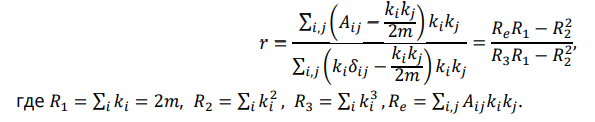

In [ ]:
def get_pcc(graph, edges):
#graph - dataframe (v1 v2 weight timelable)
#pcc - Pearson correlation coefficient.
  adj = adj_graph(graph)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbours(edges)

  r_1 = adj.shape[0]
  # r_1 = 0
  r_2 = 0
  r_3 = 0
  r_e = 0
  # for u in tqdm(nodes):
  for u in nodes:
    k = len(node_neighbors[u])
    # r_1 += k
    r_2 += math.pow(k, 2)
    r_3 += math.pow(k, 3)
    for v in node_neighbors[u]:
      r_e += len(node_neighbors[u]) * len(node_neighbors[v])
  
  r = float((r_e * r_1 - math.pow(r_2, 2))) / (r_3 * r_1 - math.pow(r_2, 2))
  return r

In [ ]:
i = 0
for df in [df1,df2,df3,df4,df5]: # Для каждого датасета определение макс компоненты слаб связ, диаметра + радиуса + 90 перцентиля - для n - рандомных вершин и подграфа "снежный ком"
  print("Название датасета: ", list_of_name[i])
  i += 1
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)
  neighbours = get_neighbours(edges)

  print("Число вершин: ", number_of_vertexes)
  print("Число направленных рёбер: ", number_of_edges_directed)
  print("Число ненаправленных рёбер: ", number_of_edges_undirected)
  print("Плотность: ", density)

  connected_components_number, ind_max_component, connected_components = dfs_and_gcc(edges, neighbours, vertexes, True)
  
  print("Число компонент слабой связности: ", connected_components_number)

  max_com_sviaz = connected_components[ind_max_component]

  # graph = init_graph(max_com_sil_sviaz,edges)
  graph = neighbours

  random_nodes = random_vert(max_com_sviaz,500)
  snowball_nodes = graph_snowball(graph,vertexes) 

  diam_rad_per = approx_diam_rad_per(graph,random_nodes)
  a = min(500, len(max_com_sviaz))

  print()
  print("Для подграфа с", a, "рандомными вершинами из компоненты связности:", sep = ' ')
  print("Диаметр: ", diam_rad_per[0])
  print("Радиус: ", diam_rad_per[1])
  print("90 процентиль: ",diam_rad_per[2],"\n")

  diam_rad_per = approx_diam_rad_per(graph,snowball_nodes)

  print("Для подграфа \"снежный ком\":")
  print("Диаметр: ", diam_rad_per[0])
  print("Радиус: ", diam_rad_per[1])
  print("90 процентиль: ", diam_rad_per[2],"\n")

  cvc = connected_components[ind_max_component]
  acc = get_acc(df, cvc, edges)
  pcc = get_pcc(df, edges)

  print('acc: ', acc)
  print('pcc: ', pcc)
  print('---------------------------------------------------------------------')
  print('\n')

Название датасета:  opsahl-ucsocial
Число вершин:  1899
Число направленных рёбер:  59835
Число ненаправленных рёбер:  13838
Плотность:  0.007678601848568738
Число компонент слабой связности:  4

Для подграфа с 500 рандомными вершинами из компоненты связности:
Диаметр:  4
Радиус:  8
90 процентиль:  4 

Для подграфа "снежный ком":
Диаметр:  4
Радиус:  7
90 процентиль:  4 

acc:  0.10974567163130962
pcc:  -0.1877757871466803
---------------------------------------------------------------------


Название датасета:  radoslaw_email_email
Число вершин:  167
Число направленных рёбер:  82927
Число ненаправленных рёбер:  3251
Плотность:  0.23454296226823462
Число компонент слабой связности:  1

Для подграфа с 167 рандомными вершинами из компоненты связности:
Диаметр:  3
Радиус:  5
90 процентиль:  3 

Для подграфа "снежный ком":
Диаметр:  3
Радиус:  5
90 процентиль:  3 

acc:  0.5918632085486949
pcc:  -0.29442416038907004
---------------------------------------------------------------------


На

2 задание
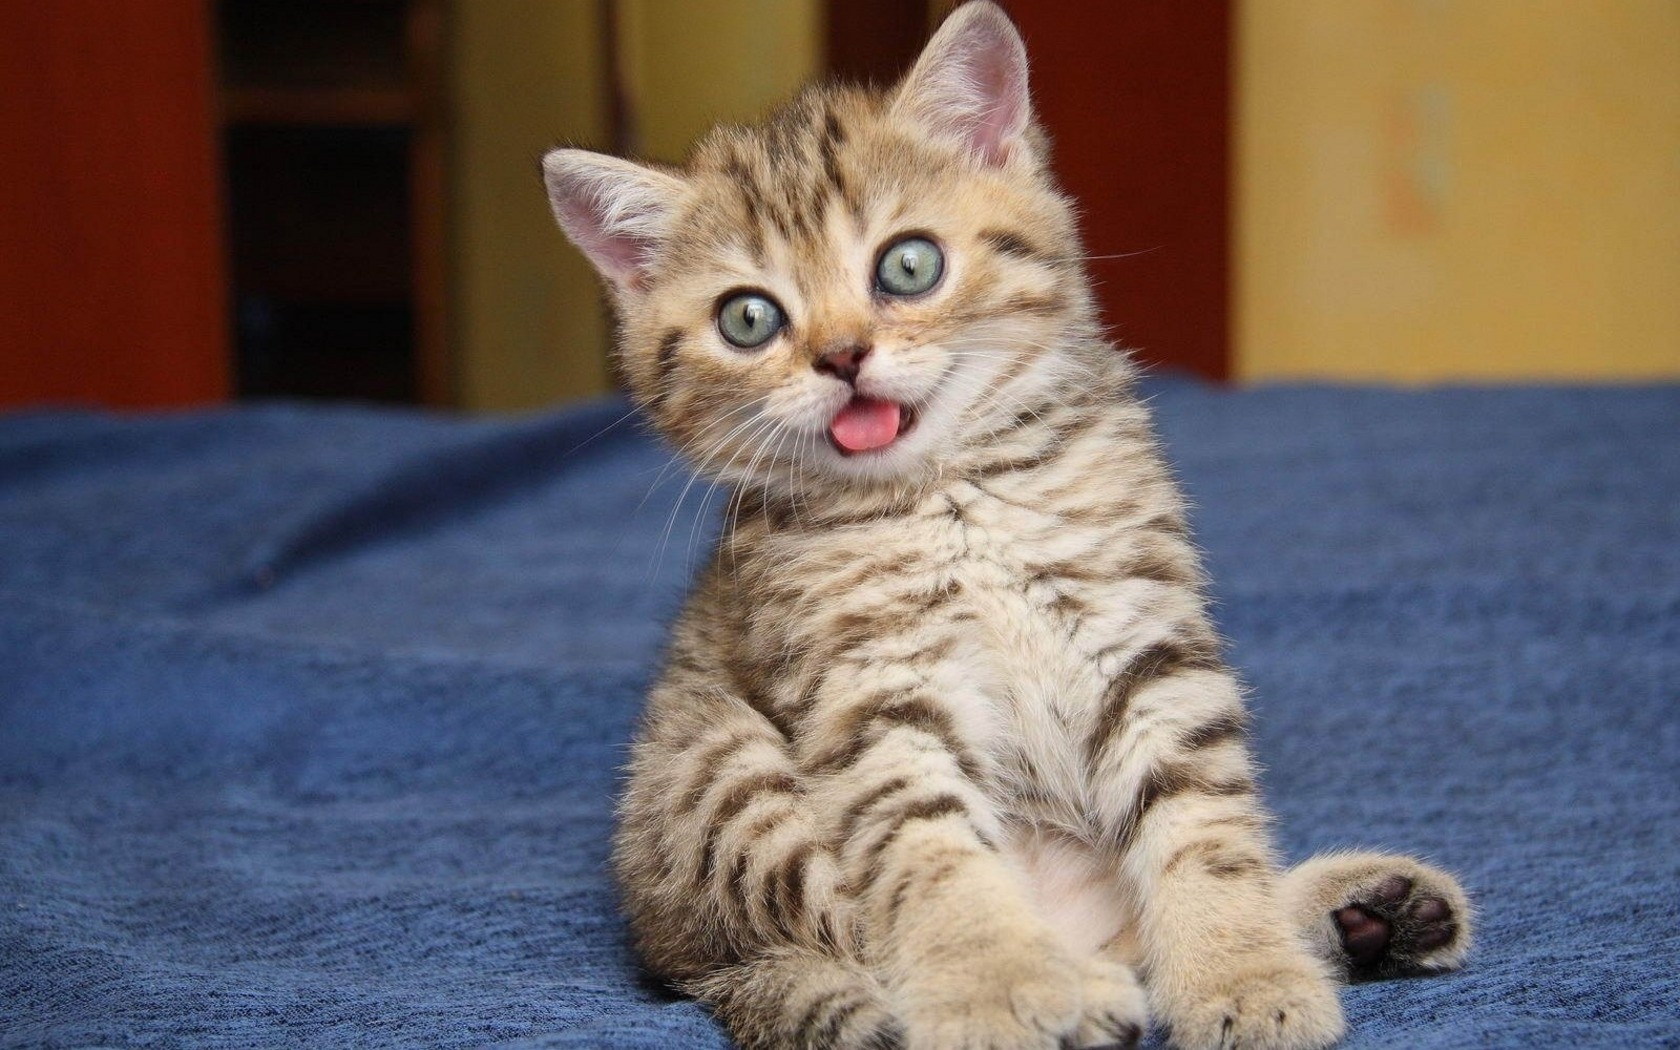

**Получение пар вершин с кратчайшим расстоянием 2**


In [ ]:
def edges_dist_2(df):
  vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df)

  connected_components_number, ind_max_component, connected_components = dfs_and_gcc(edges, neighbours, vertexes, True)
  
  graph = get_neighbours(edges)

  d = 0
  r = 1e+10
  list_with_eccentricities = []
  distances = []
  edge_dist_2 = set()
  v1 = []
  v2 = []
  for vertex in vertexes:
      current_geo = bfs_distances(graph, vertex)
      for key, value in current_geo.items():
        if value == 2:
          v1.append(vertex)
          v2.append(key)
          edge_dist_2.add((vertex,key))
  
  data = {'v1': v1,
          'v2': v2}
  df1 = pd.DataFrame(data)
  return df1


In [ ]:
i = 1
for df in list_of_df:
  locals()[f'p{i}'] = edges_dist_2(df)
  i += 1

In [ ]:
list_of_p = [p1, p2, p3, p4, p5]

In [ ]:
def static_topological_features_pairs(graph,edge_dist_2):
  CN = []
  AA = []
  JC = []
  PA = []
  visited = set()
  for i, row in edge_dist_2.iterrows():
    vert = row['v1']
    node = row['v2']
    common_neigh = graph[vert] & graph[node]
    CN.append(len(common_neigh))
    AA_ = 0
    for neigh in common_neigh:
      AA_ += 1/math.log(len(graph[neigh]))
    AA.append(AA_)
    try:
      JC.append(len(common_neigh) / len(graph[vert] | graph[node]))
    except(Exception):
      print(vert, node, graph[vert], graph[node])
    PA.append(len(graph[vert]) * len(graph[node]))
  return CN,AA,JC,PA

In [ ]:
def insert_into_df(df, edges_with_сombining):
  weights = list()
  
  for _, edge in df.iterrows():
    edge_w = list()
    tmp = edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]
    for type1 in ['lin', 'exp', 'sqrt']:
      for type2 in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        for type3 in ['sum', 'abs_diff', 'min', 'max']:
          edge_w.append(tmp[type1][type2][type3])

    weights.append(edge_w)
    
  edges_with_сombining = None
  column = ["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","f31","f32","f33","f34","f35","f36","f37","f38","f39","f40","f41","f42","f43","f44","f45","f46","f47","f48","f49","f50","f51","f52","f53","f54","f55","f56","f57","f58","f59","f60","f61","f62","f63","f64","f65","f66","f67","f68","f69","f70","f71","f72","f73","f74","f75","f76","f77","f78","f79","f80","f81","f82","f83"]
  tmp_df = pd.DataFrame(weights, columns = column )
  df = pd.concat([df, tmp_df], axis = 1)
  return df


In [ ]:
def part_2(df_b_array, df_g_array, list_of_name, df_for_fichers):
  i = 0
  list_result_df = list()

  for df_b, df_g, df_f in zip(df_b_array, df_g_array, df_for_fichers):
    print("Название датасета: ", list_of_name[i])
    l = 0.2
    t_min = df_f.timestamp.min()
    t_max = df_f.timestamp.max()
    delta_t = t_max - t_min

    df_f = df_f.sort_values(by=['timestamp'])
    vertexes, number_of_vertexes, number_of_edges_directed, edges, number_of_edges_undirected, density = task_1(df_f)
    edges_with_params, nodes_with_params, edges_with_сombining, result_df = get_params(df_f, df_b, df_g, edges)
    
    get_temporal_weighting(df_f, edges_with_params, l, t_min, delta_t)
    fill_nodes(edges_with_params, nodes_with_params)
    quantiles_plus(edges_with_params, nodes_with_params)
    combining_node_activity(edges_with_сombining, nodes_with_params)
    result_df = insert_into_df(result_df, edges_with_сombining)
    print('------------------------------------------------------------------------------------------')
    list_result_df.append(result_df)

    i +=1
    print()
  return list_result_df


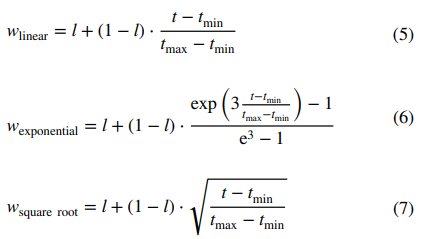

In [ ]:
def get_sub_f(t, t_min, delta_t):
  return (t - t_min) / delta_t

def get_w_lin(l, sub_f):
  return l + (1 - l) * sub_f

def get_w_exp(l, sub_f):
  return l + (1 - l) * (math.exp(3 * sub_f) - 1) / (math.pow(math.e, 3) - 1)

def get_w_sqrt(l, sub_f):
  return l + (1 - l) * math.sqrt(sub_f)


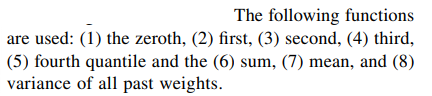

In [ ]:
def get_zeroth(w):
  return np.min(w)

def get_first(w):
  return np.quantile(w, .25)

def get_second(w):
  return np.median(w)

def get_third(w):
  return np.quantile(w, .75)

def get_fourth(w):
  return w[-1]

def get_sum(w):
  return np.sum(w)

def get_mean(w):
  return np.mean(w)


In [ ]:
# 4.1.3
def get_params(graph, graph_1, graph_2, edges):
  all_nodes = np.sort(adj_graph(graph).v1.unique())
  posibility_edges = itertools.combinations_with_replacement(all_nodes, 2)
  temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
  quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
  сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

  params = {'lin': {'w_lin': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}},
            'exp': {'w_exp': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}},
            'sqrt': {'w_sqrt': list(), 'quant_p': {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}}} 

  params2 = {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
             'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}
            
  params3 = {'lin': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}, 
             'exp': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                     'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}, 
             'sqrt': {'zeroth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'first': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'second': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'third': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'fourth': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 'sum': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}, 
                      'mean': {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}}}



  choice_1 = np.random.randint(0, graph_1.shape[0], 10000)
  choice_2 = np.random.randint(0, graph_2.shape[0], 10000)

  graph_1['result'] = 0
  graph_2['result'] = 1
  
  result_df = pd.concat([graph_1.iloc[choice_1], graph_2.iloc[choice_2]], sort=False, ignore_index=True, axis=0)
  
  edges_with_params = defaultdict(None)
  nodes_with_params = defaultdict(None)
  edges_with_сombining = defaultdict(None)

  for edge in edges:
    edges_with_params[edge] = deepcopy(temporal_weighting)
  for node in all_nodes:
    nodes_with_params[node] = deepcopy(params)
  for _, edge in result_df.iterrows():
    edges_with_сombining[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))] = deepcopy(params3)

  return edges_with_params, nodes_with_params, edges_with_сombining, result_df

In [ ]:
def time_normalization(timestemp, t_min, delta_t):
  return (timestemp - t_min) / delta_t

In [ ]:
# 4.1.3
def get_temporal_weighting(graph, edges_with_params, l, t_min, delta_t):
  for _, edge in graph.iterrows():
    params = edges_with_params[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]

    norm_t = time_normalization(edge.timestamp, t_min, delta_t)
    sub_f = get_sub_f(norm_t, 0, 1)

    params['w_lin'].append(get_w_lin(l, sub_f))
    params['w_exp'].append(get_w_exp(l, sub_f))
    params['w_sqrt'].append(get_w_sqrt(l, sub_f))


In [ ]:
# 4.1.3
def fill_nodes(edges_with_params, nodes_with_params):
  for key in edges_with_params:
    params = edges_with_params[key]
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[u][w_type]['w_' + w_type].extend(params['w_' + w_type])
      nodes_with_params[v][w_type]['w_' + w_type].extend(params['w_' + w_type])

    params = None 
    
  for key in nodes_with_params:
    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[key][w_type]['w_' + w_type].sort()


In [ ]:
# 4.1.3
# temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
# quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def quantiles_plus(edges_with_params, nodes_with_params):
  fill_nodes(edges_with_params, nodes_with_params)

  for key in nodes_with_params:
    params = nodes_with_params[key]

    for w_type in ['lin', 'exp', 'sqrt']:
      tmp = params[w_type]['quant_p']
      tmp2 = params[w_type]['w_' + w_type]

      tmp['zeroth'] = get_zeroth(tmp2)
      tmp['first'] = get_first(tmp2)
      tmp['second'] = get_second(tmp2)
      tmp['third'] = get_third(tmp2)
      tmp['fourth'] = get_fourth(tmp2)
      tmp['sum'] = get_sum(tmp2)
      tmp['mean'] = get_mean(tmp2)

In [ ]:
def get_sum_c(a, b):
  return a + b
  
def get_abs_diff(a, b):
  return abs(a - b)
  
def get_min(a, b):
  return min(a, b)
  
def get_max(a, b):
  return max(a, b)

In [ ]:
# 4.1.3
# params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
#            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
#            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
#            'mean': deepcopy(сombining)}

def combining_node_activity(edges_with_сombining, nodes_with_params):
  for key in edges_with_сombining:
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      edge = edges_with_сombining[key][w_type]
      u_node = nodes_with_params[u][w_type]['quant_p']
      v_node = nodes_with_params[v][w_type]['quant_p']
    
      for p_type in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        p_edge = edge[p_type]
        p_u_node = u_node[p_type]
        p_v_node = v_node[p_type]
        p_edge['sum'] = get_sum_c(p_u_node, p_v_node) 
        p_edge['abs_diff'] = get_abs_diff(p_u_node, p_v_node) 
        p_edge['min'] = get_min(p_u_node, p_v_node) 
        p_edge['max'] = get_max(p_u_node, p_v_node) 

In [ ]:
list_of_before, list_of_after = [], []
for df in list_of_df:
  # print(df.head(1))
  list_of_before.append(df[df.timestamp <= np.quantile(df.timestamp, q = 0.7)])
  list_of_after.append(df[df.timestamp > np.quantile(df.timestamp, q = 0.7)])

   v1  v2  weight   timestamp
0   1   2       1  1082008561
   v1  v2  weight   timestamp
0   1   2       1  1262454010
   v1  v2  weight     timestamp
0   1   2       4  1.289242e+09
     v1    v2  timestamp
0  1874  1258        792
    v1   v2  timestamp
0  582  364          0


In [ ]:
def get_dist_2_edges(list_of_df):
  list_of_dist_2_df = list()
  for df in list_of_df:
    list_of_dist_2_df.append(edges_dist_2(df))
  return list_of_dist_2_df# список дф_before в каждом из которых расстояние между двумя вершинами 2


In [ ]:
list_of_before_2 = get_dist_2_edges(list_of_before)

негативные примеры
посчитать фичи на лист оф бефор для негативных и позитивных ребер
разделить и обучить

In [ ]:
# какие вершины из лист оф бефоре 2 появились в листо оф афтер
list_of_good = []
for b2,a in zip(list_of_before_2, list_of_after):
  # print(b2.shape[0], a.shape[0])
  list_of_good.append(pd.merge(b2, a, how = 'inner', on = ['v1','v2']))

467930 17951
16196 24865
1345094 10678
200928 3518
332828 99700


list)of)good - ребра появятся после timestamp


In [ ]:
list_of_bad = []
for b2, a in zip(list_of_before_2, list_of_good):
  # print(b2.shape[0], a.shape[0])
  list_of_bad.append(pd.concat([b2, a]).drop_duplicates(keep=False))

467930 3197
16196 955
1345094 1920
200928 2726
332828 7343


In [ ]:
list_of_bad[0]# timestamp есть если ребра появились до но не пояивлись потом

,v1,v2,weight,timestamp
0,1,400,NaN,NaN
1,1,5,NaN,NaN
2,1,1127,NaN,NaN
3,1,289,NaN,NaN
4,1,770,NaN,NaN
...,...,...,...,...
3192,1493,176,1.0,1.089305e+09
3193,1493,176,1.0,1.089305e+09
3194,1493,176,1.0,1.089305e+09
3195,1493,176,1.0,1.089306e+09


In [ ]:
list_of_good[0]# это позитивные примеры

,v1,v2,weight,timestamp
0,1,161,1,1086593076
1,1,161,1,1086651067
2,1,161,1,1086776453
3,1,161,1,1086855030
4,1,161,1,1086874009
...,...,...,...,...
3192,1493,176,1,1089305136
3193,1493,176,1,1089305304
3194,1493,176,1,1089305427
3195,1493,176,1,1089305570


In [ ]:
list_result_df = part_2(list_of_bad, list_of_good, list_of_name, list_of_before)

Название датасета:  opsahl-ucsocial


100%|██████████| 1498/1498 [00:02<00:00, 522.42it/s]


------------------------------------------------------------------------------------------

Название датасета:  radoslaw_email_email


100%|██████████| 166/166 [00:00<00:00, 182.80it/s]


------------------------------------------------------------------------------------------

Название датасета:  soc-sign-bitcoinotc


100%|██████████| 4451/4451 [00:05<00:00, 881.12it/s]


------------------------------------------------------------------------------------------

Название датасета:  dnc-corecipient


100%|██████████| 890/890 [00:00<00:00, 1001.17it/s]


------------------------------------------------------------------------------------------

Название датасета:  email-Eu-core-temporal.txt


100%|██████████| 913/913 [00:02<00:00, 358.89it/s]


------------------------------------------------------------------------------------------



In [ ]:
list_result_df[0]

,v1,v2,weight,timestamp,result,f0,f1,f2,f3,f4,...,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83
0,68,282,NaN,NaN,0,0.711911,0.077126,0.317393,0.394518,1.129717,...,0.975163,0.995154,754.167618,371.357351,191.405134,562.762484,1.615085,0.020857,0.797114,0.817971
1,1213,1381,NaN,NaN,0,1.741818,0.092609,0.824605,0.917214,1.759970,...,0.990487,0.994435,551.259415,416.318286,67.470564,483.788851,1.900814,0.026632,0.937091,0.963723
2,237,164,NaN,NaN,0,0.730009,0.021196,0.354406,0.375603,0.733463,...,0.659473,0.856447,32.099777,7.345614,12.377081,19.722695,1.267695,0.107536,0.580079,0.687616
3,1063,1340,NaN,NaN,0,1.622145,0.172492,0.724826,0.897318,1.641462,...,0.978154,0.992732,122.719532,100.846112,10.936710,111.782822,1.875037,0.052253,0.911392,0.963645
4,386,584,NaN,NaN,0,0.953855,0.078630,0.437613,0.516243,0.965219,...,0.774314,0.973446,85.649549,76.865762,4.391894,81.257656,1.470688,0.006724,0.731982,0.738706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,431,561,1.0,1.090666e+09,1,0.954212,0.043318,0.455447,0.498765,1.183766,...,0.984224,0.988415,613.223162,255.378884,178.922139,434.301023,1.677911,0.080392,0.798760,0.879152
19996,95,1403,1.0,1.094907e+09,1,1.253674,0.610496,0.321589,0.932085,1.325477,...,0.962580,0.991952,290.017834,169.430541,60.293646,229.724188,1.704084,0.240872,0.731606,0.972478
19997,431,561,1.0,1.091563e+09,1,0.954212,0.043318,0.455447,0.498765,1.183766,...,0.984224,0.988415,613.223162,255.378884,178.922139,434.301023,1.677911,0.080392,0.798760,0.879152
19998,547,525,1.0,1.088793e+09,1,0.964444,0.008819,0.477813,0.486631,1.219913,...,0.974441,0.989905,478.779130,120.053786,179.362672,299.416458,1.688513,0.087355,0.800579,0.887934


In [ ]:
for df, p in zip(list_of_before, list_result_df):
  # print(df.head(1))
  edges = sorted(set(zip((df[['v1','v2']]).min(axis = 1), (df[['v1','v2']]).max(axis = 1))))
  neighbours = get_neighbours(edges)
  p['CN'], p['AA'], p['JC'], p['PA'] = static_topological_features_pairs(neighbours,p)


   v1  v2  weight   timestamp
0   1   2       1  1082008561
   v1  v2  weight   timestamp
0   1   2       1  1262454010
   v1  v2  weight     timestamp
0   1   2       4  1.289242e+09
        v1   v2  timestamp
3518  1195  430          9
    v1   v2  timestamp
0  582  364          0


In [ ]:
list_result_df[1]

,v1,v2,weight,timestamp,result,f0,f1,f2,f3,f4,...,f78,f79,f80,f81,f82,f83,CN,AA,JC,PA
0,138,41,NaN,NaN,0,0.436200,0.022849,0.206676,0.229525,0.791037,...,38.919719,229.011120,1.450944,0.045968,0.702488,0.748456,2,0.408425,0.083333,88
1,59,77,NaN,NaN,0,0.413668,0.000178,0.206745,0.206923,0.774676,...,1050.759326,3494.387655,1.434003,0.040423,0.696790,0.737213,31,7.310872,0.469697,2332
2,74,115,1.0,1.285322e+09,0,0.422485,0.008827,0.206829,0.215656,0.916400,...,669.786198,1354.179523,1.497442,0.066275,0.715584,0.781859,28,6.647638,0.394366,2394
3,76,109,NaN,NaN,0,0.418800,0.004987,0.206906,0.211893,0.735519,...,192.863387,2872.998730,1.446858,0.028745,0.709057,0.737801,15,3.400504,0.272727,1125
4,158,69,NaN,NaN,0,0.868856,0.455228,0.206814,0.662042,1.053687,...,1.615950,2917.011780,1.531440,0.084510,0.723465,0.807975,1,0.271085,0.016393,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,63,133,1.0,1.281519e+09,1,0.431928,0.018341,0.206794,0.225134,0.630661,...,22.691699,812.492334,1.288747,0.028097,0.630325,0.658422,9,1.935079,0.166667,650
19996,90,23,1.0,1.283858e+09,1,0.413896,0.000846,0.206525,0.207371,0.731856,...,800.634451,1009.976646,1.404471,0.024067,0.690202,0.714269,49,12.246210,0.515789,5148
19997,65,58,1.0,1.285754e+09,1,0.413533,0.000060,0.206736,0.206797,0.744560,...,1087.211649,1983.800938,1.434742,0.015405,0.709668,0.725073,23,5.346679,0.383333,1720
19998,58,59,1.0,1.285596e+09,1,0.413482,0.000009,0.206736,0.206745,0.771134,...,1087.211649,3494.387655,1.446881,0.027544,0.709668,0.737213,25,5.806072,0.352113,2279


In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import ast

In [ ]:
cols=[ 'CN', 'AA', 'JC', 'PA', 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'] 


In [ ]:
cols_static=[ 'CN', 'AA', 'JC', 'PA'] 

In [ ]:
cols_temporal = [ 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'] 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
def logReg(list_result_df, cols, list_of_name):
  figure1, axis1 = plt.subplots(3, 5)
  figure2, axis2 = plt.subplots(3, 5)
  i = 1
  for p, name in zip(list_result_df, list_of_name):
    X=p[cols]
    y=p['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    res = logreg.predict_proba(X_test)
    y_predict = logreg.predict(X_test)


    fig, axs = plt.subplots(2)
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(x, y)
    axs[1].plot(x, -y)

    cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
    axs[0] = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=logreg.classes_)
    axs[0].plot(i//3, i/5)
    # plt.show()

    lr_auc = roc_auc_score(y_test, res[:,1])
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, res[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    axs[1].plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[1].xlim([0.0, 1.0])
    axs[1].ylim([0.0, 1.05])
    axs[1].xlabel('False Positive Rate')
    axs[1].ylabel('True Positive Rate')
    axs[1].legend(loc="lower right")
    
    fig.suptitle(list_of_name[i])
    plt.show()

    print('Название датсета:', name)
    print(metrics.roc_auc_score(y_test, res[:,1]))
    print('------------------------------------')

In [ ]:
#Графики побольше
def logReg(list_result_df, cols, list_of_name):
  i = 0
  for p, name in zip(list_result_df, list_of_name):
    X=p[cols]
    y=p['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    res = logreg.predict_proba(X_test)
    y_predict = logreg.predict(X_test)

    #figure, axis = plt.subplots(5, 3)
    print('Название датсета:', name)
    print(metrics.roc_auc_score(y_test, res[:,1]))
    print('------------------------------------')

    cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=logreg.classes_)
    
    disp.plot()
    plt.grid(False)
    plt.show()

    lr_auc = roc_auc_score(y_test, res[:,1])
    print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, res[:,1])
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(list_of_name[i])
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    i= i+1

	Смешанные
Название датсета: opsahl-ucsocial
0.8626110555555555
------------------------------------


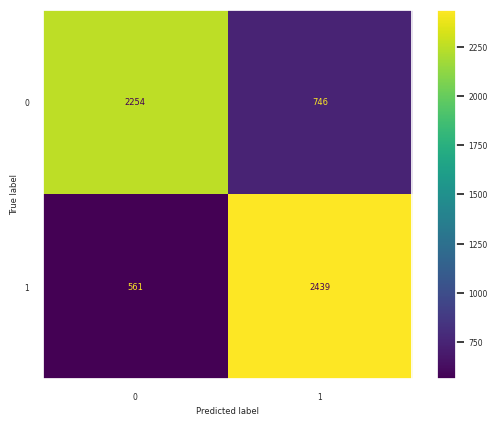

LogisticRegression: ROC AUC=0.863


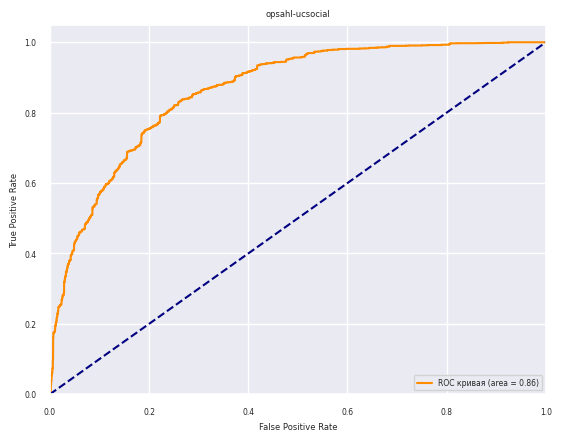

Название датсета: radoslaw_email_email
0.8810643888888889
------------------------------------


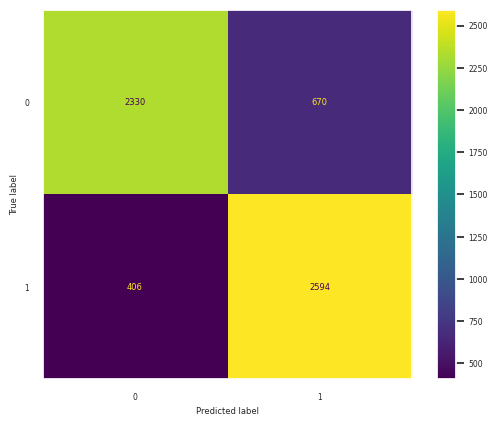

LogisticRegression: ROC AUC=0.881


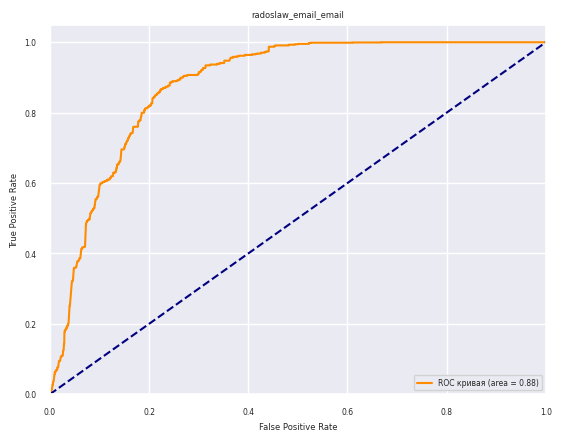

Название датсета: soc-sign-bitcoinotc
0.9560036666666666
------------------------------------


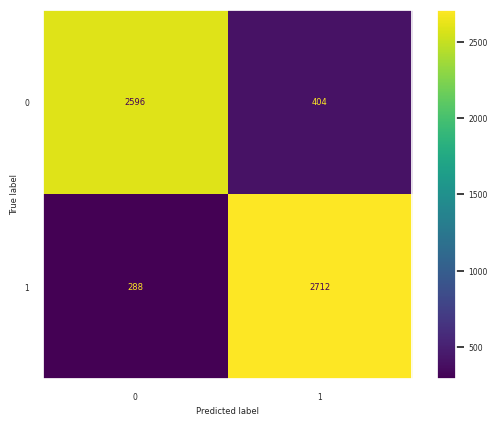

LogisticRegression: ROC AUC=0.956


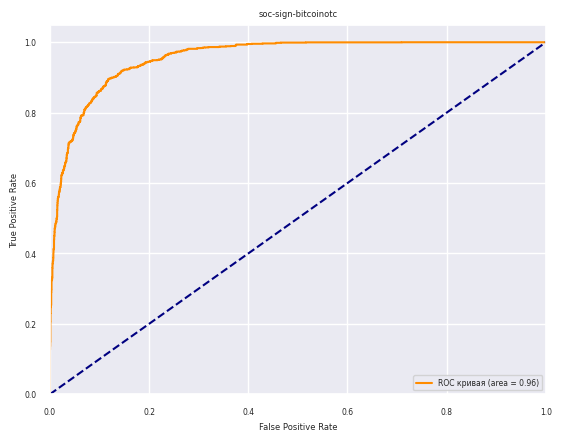

Название датсета: dnc-corecipient
0.9551271666666667
------------------------------------


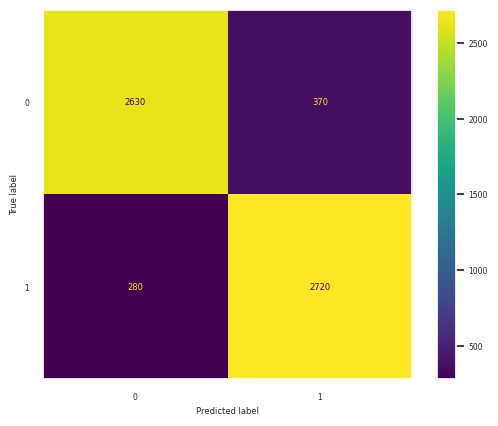

LogisticRegression: ROC AUC=0.955


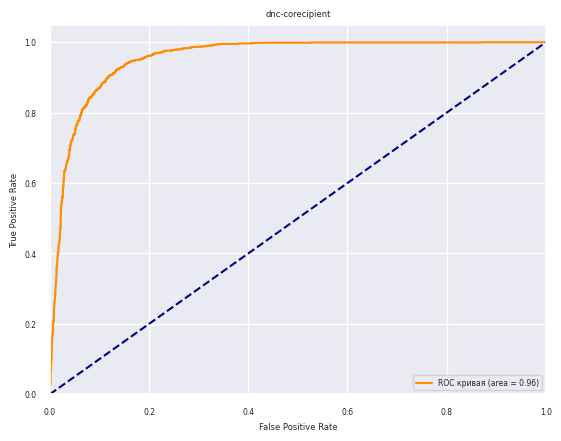

Название датсета: email-Eu-core-temporal.txt
0.8664972222222221
------------------------------------


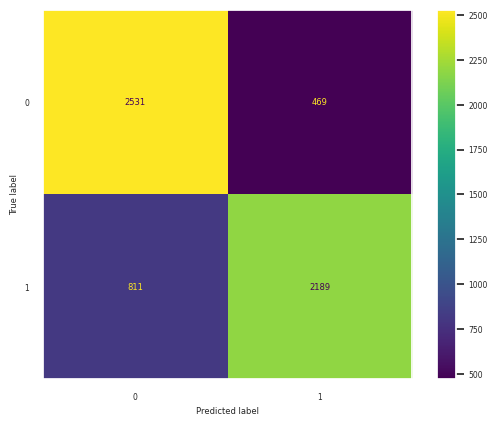

LogisticRegression: ROC AUC=0.866


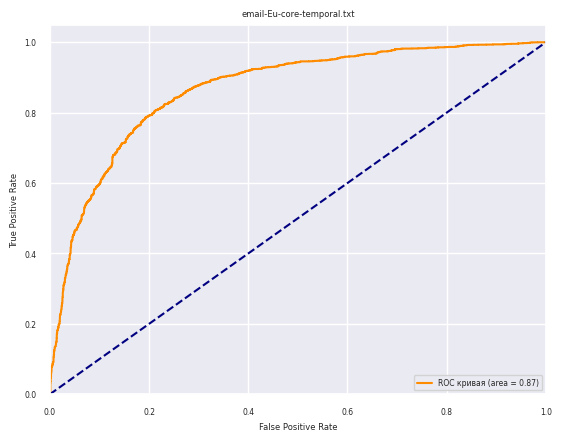


	Статические
Название датсета: opsahl-ucsocial
0.7672692222222222
------------------------------------


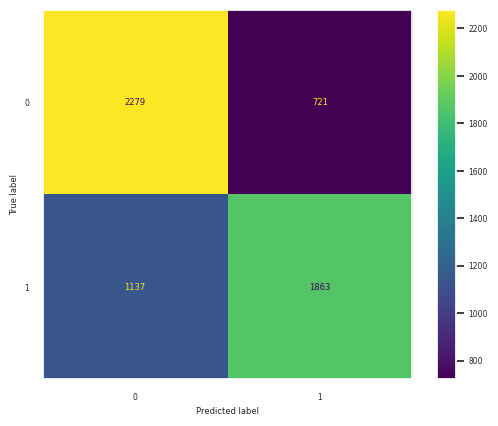

LogisticRegression: ROC AUC=0.767


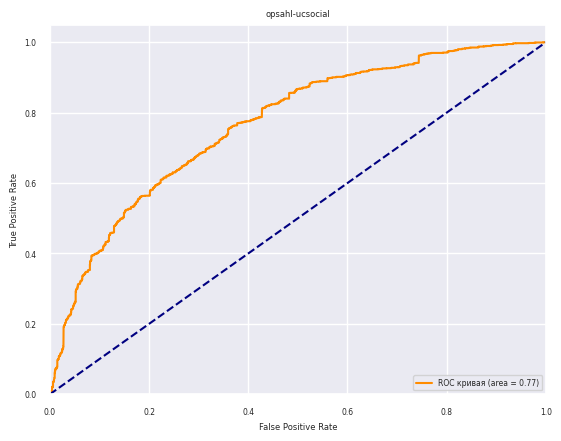

Название датсета: radoslaw_email_email
0.8351891666666666
------------------------------------


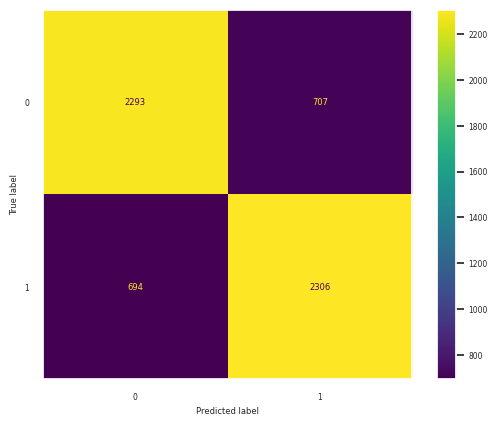

LogisticRegression: ROC AUC=0.835


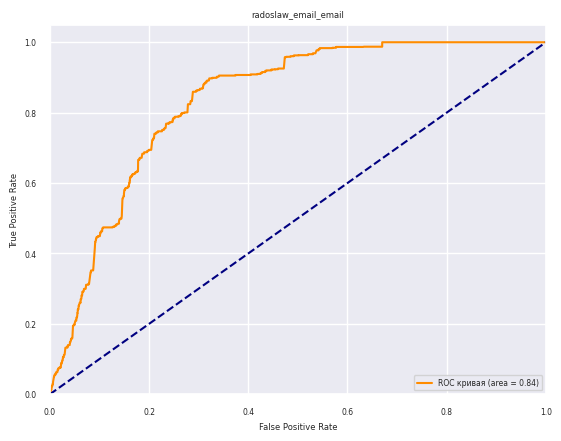

Название датсета: soc-sign-bitcoinotc
0.8794977777777778
------------------------------------


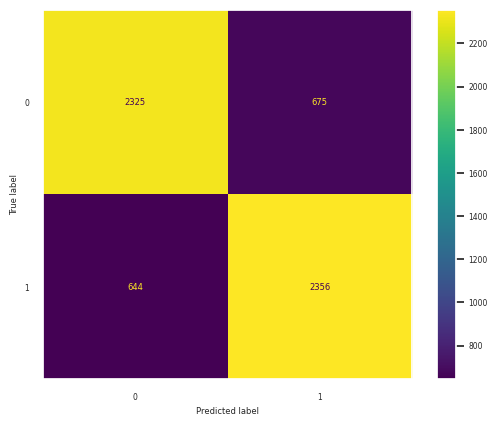

LogisticRegression: ROC AUC=0.879


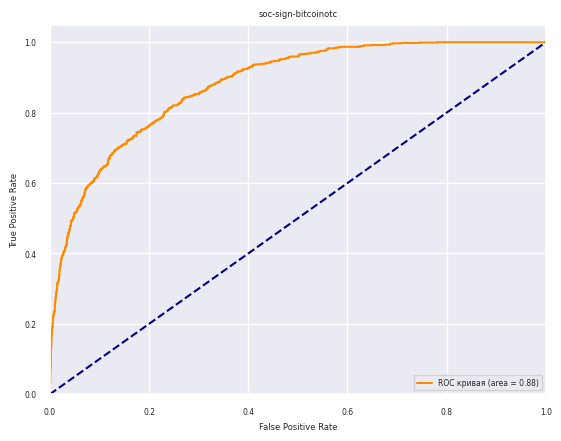

Название датсета: dnc-corecipient
0.9461202777777779
------------------------------------


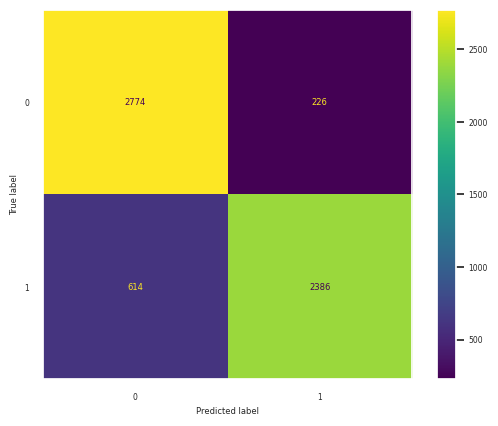

LogisticRegression: ROC AUC=0.946


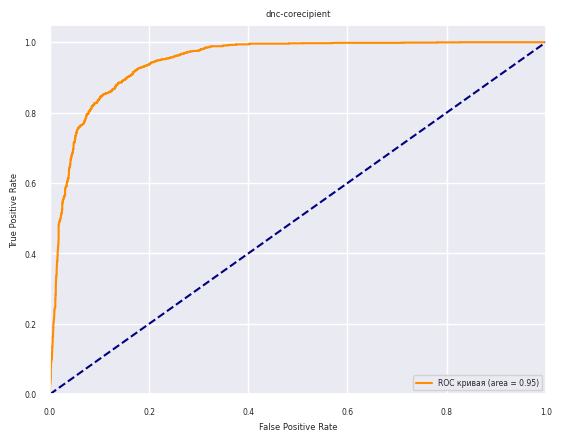

Название датсета: email-Eu-core-temporal.txt
0.8085819444444444
------------------------------------


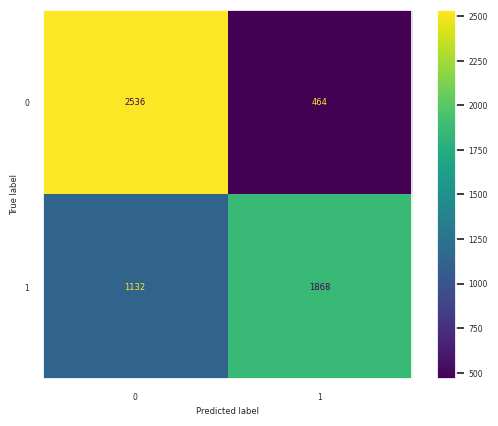

LogisticRegression: ROC AUC=0.809


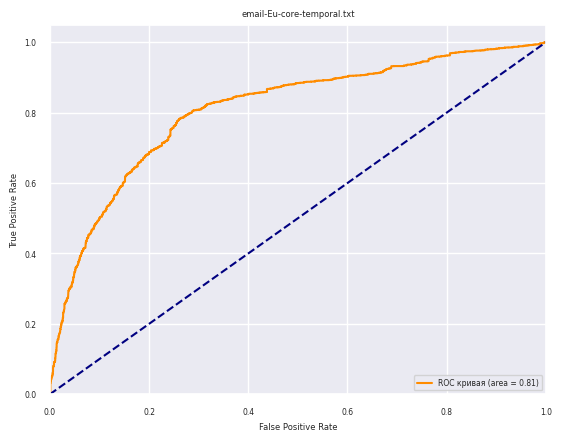


	Временные
Название датсета: opsahl-ucsocial
0.8426486111111111
------------------------------------


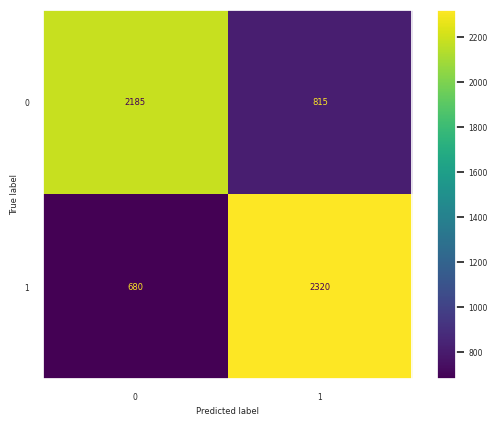

LogisticRegression: ROC AUC=0.843


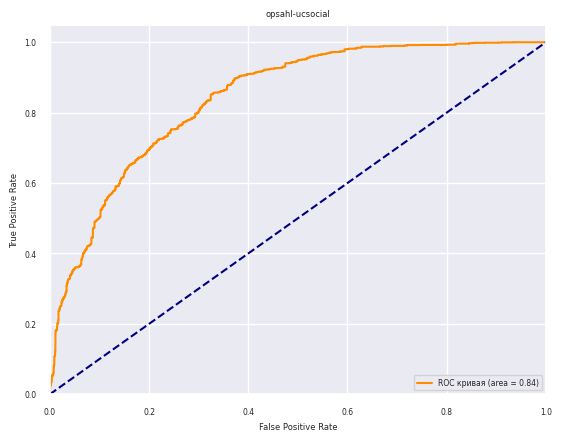

Название датсета: radoslaw_email_email
0.8440225
------------------------------------


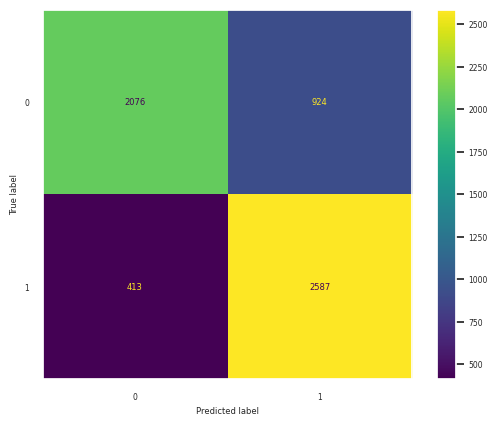

LogisticRegression: ROC AUC=0.844


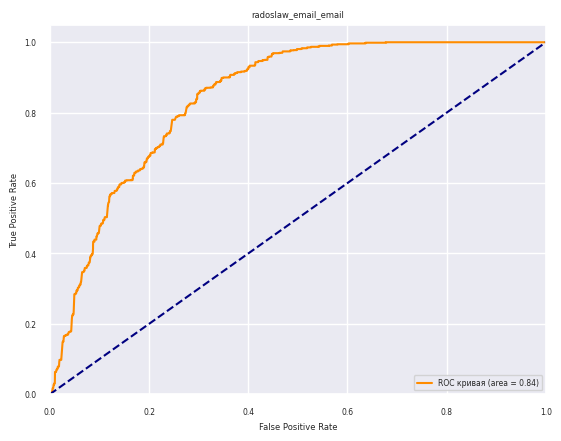

Название датсета: soc-sign-bitcoinotc
0.9488447777777779
------------------------------------


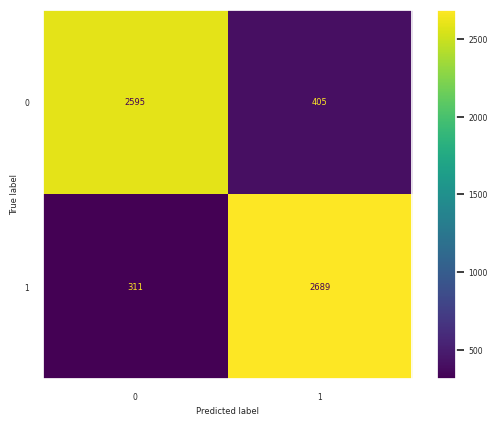

LogisticRegression: ROC AUC=0.949


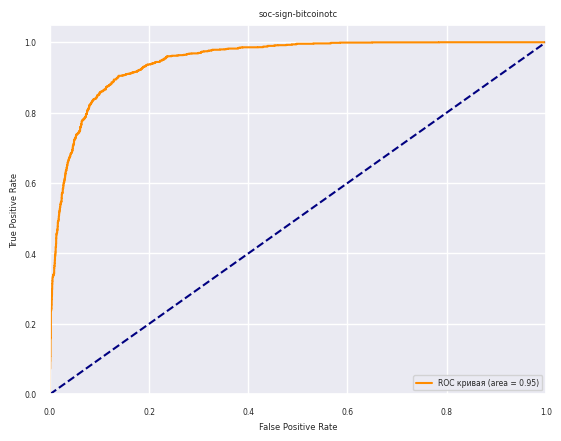

Название датсета: dnc-corecipient
0.9481207222222222
------------------------------------


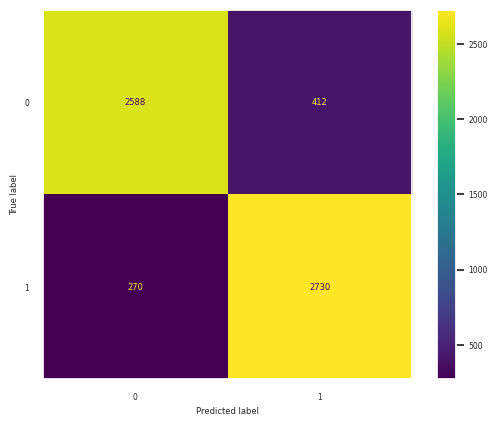

LogisticRegression: ROC AUC=0.948


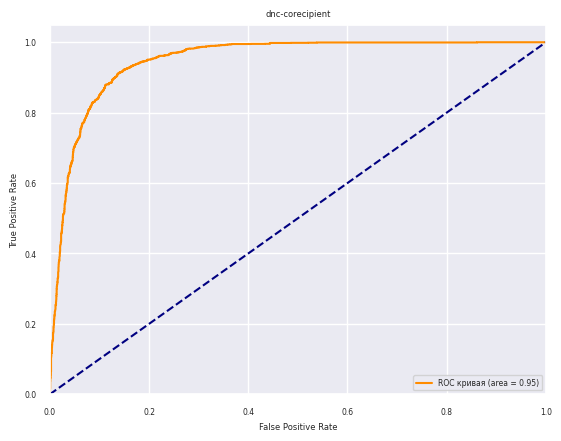

Название датсета: email-Eu-core-temporal.txt
0.7590081111111111
------------------------------------


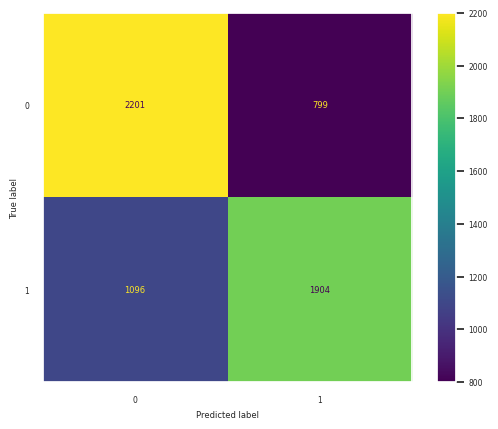

LogisticRegression: ROC AUC=0.759


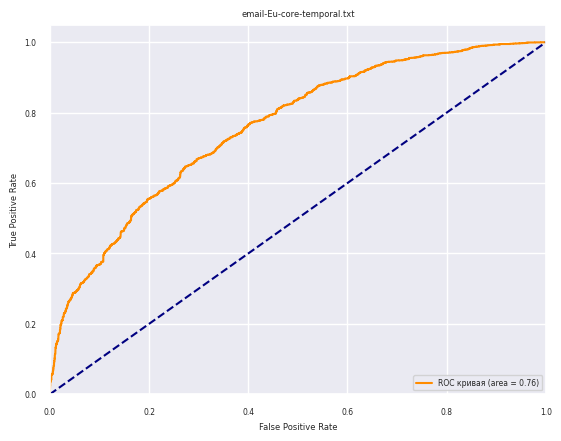

In [ ]:
for c, t in [(cols, '\tСмешанные'), (cols_static, '\tСтатические'), (cols_temporal, '\tВременные')]:
  print(t)
  logReg(list_result_df, c, list_of_name)
  print()

In [ ]:
#Графики поменьше
def logReg(list_result_df, list_of_name, cols, cols_static, cols_temporal):
  fig, axis = plt.subplots(3, 5, figsize=(20, 12))
  fig2, axis2 = plt.subplots(3, 5, figsize=(20, 12))

  i = 0
  for c, t in [(cols, '\tСмешанные'), (cols_static, '\tСтатические'), (cols_temporal, '\tВременные')]:
    j = 0
    for p, name in zip(list_result_df, list_of_name):
      X=p[c]
      y=p['result']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      logreg = LogisticRegression()
      logreg.fit(X_train, y_train)
      res = logreg.predict_proba(X_test)
      y_predict = logreg.predict(X_test)

      
      print('Название датсета:', name)
      print(metrics.roc_auc_score(y_test, res[:,1]))
      print('------------------------------------')

      cm = confusion_matrix(y_test, y_predict, labels=logreg.classes_)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels=logreg.classes_)
      disp.plot(ax=axis[i, j])
      axis[i, j].grid(False)
      axis[i, j].set_title(list_of_name[j])
      # рассчитываем roc-кривую
      fpr, tpr, treshold = roc_curve(y_test, res[:,1])
      roc_auc = auc(fpr, tpr)
      # строим график
      axis2[i, j].plot(fpr, tpr, color='darkorange',
              label='ROC кривая (area = %0.2f)' % roc_auc)
      axis2[i, j].plot([0, 1], [0, 1], color='navy', linestyle='--')
      axis2[i, j].set_xlim([0.0, 1.0])
      axis2[i, j].set_ylim([0.0, 1.05])
      axis2[i, j].set_xlabel('False Positive Rate')
      axis2[i, j].set_ylabel('True Positive Rate')
      axis2[i, j].set_title(list_of_name[j])
      axis2[i, j].legend(loc="lower right")
      axis2[i, j].grid(True)

      j += 1
    i += 1
  # axis.show()
  # axis2.show()

Название датсета: opsahl-ucsocial
0.8626110555555555
------------------------------------
Название датсета: radoslaw_email_email
0.8810643888888889
------------------------------------
Название датсета: soc-sign-bitcoinotc
0.9560036666666666
------------------------------------
Название датсета: dnc-corecipient
0.9551271666666667
------------------------------------
Название датсета: email-Eu-core-temporal.txt
0.8664972222222221
------------------------------------
Название датсета: opsahl-ucsocial
0.7672692222222222
------------------------------------
Название датсета: radoslaw_email_email
0.8351891666666666
------------------------------------
Название датсета: soc-sign-bitcoinotc
0.8794977777777778
------------------------------------
Название датсета: dnc-corecipient
0.9461202777777779
------------------------------------
Название датсета: email-Eu-core-temporal.txt
0.8085819444444444
------------------------------------
Название датсета: opsahl-ucsocial
0.8426486111111111
-------

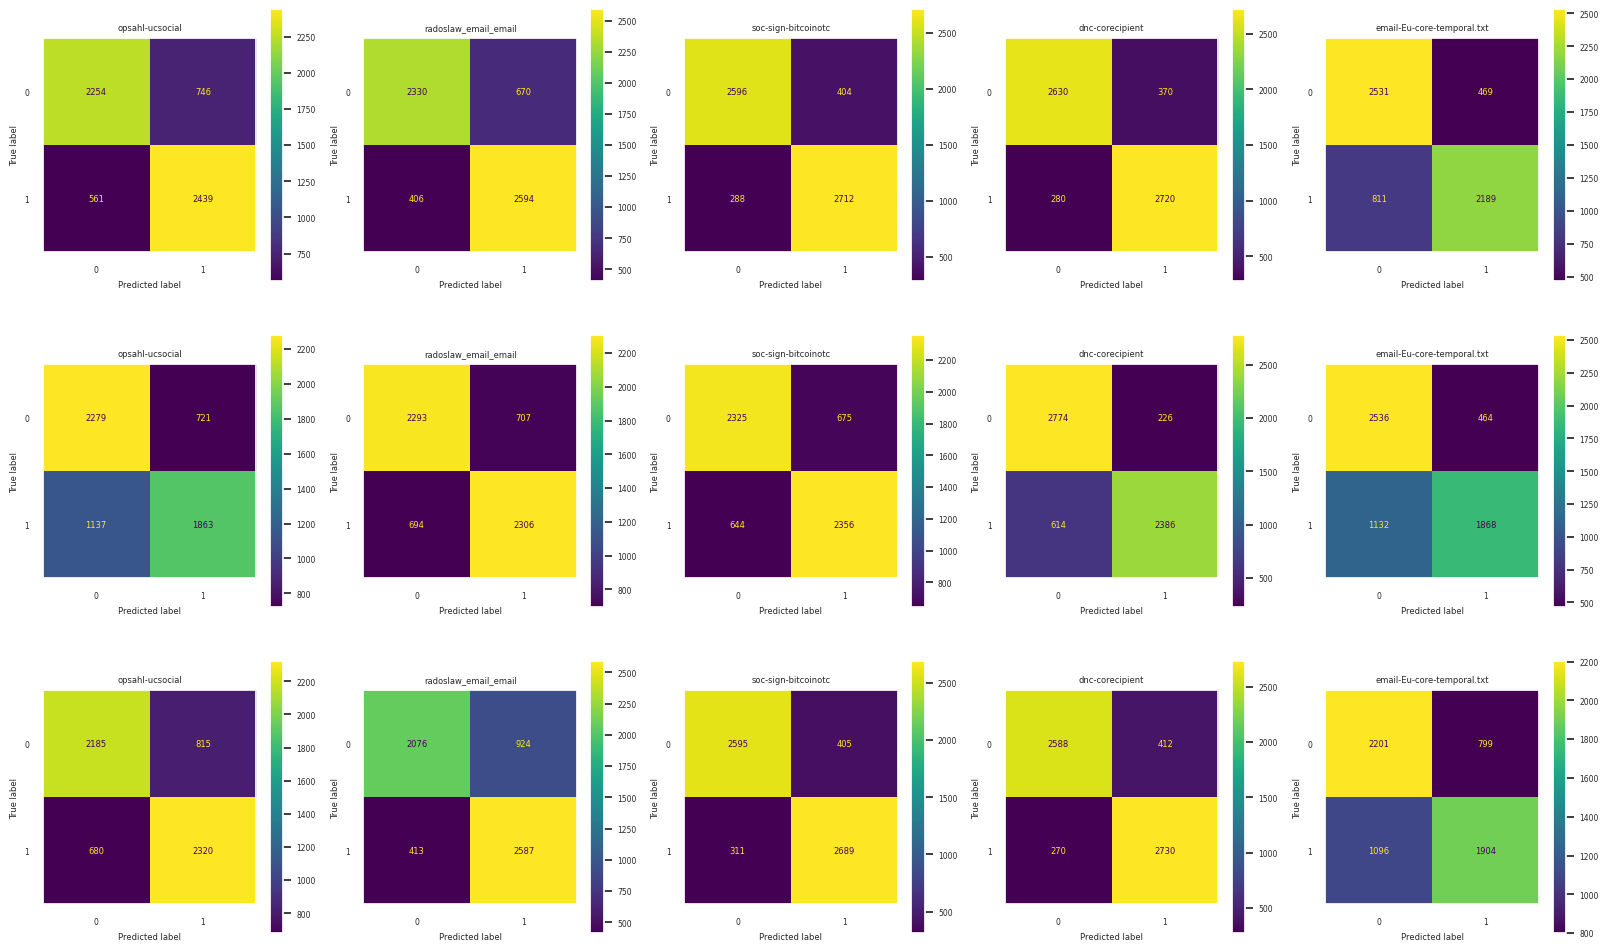

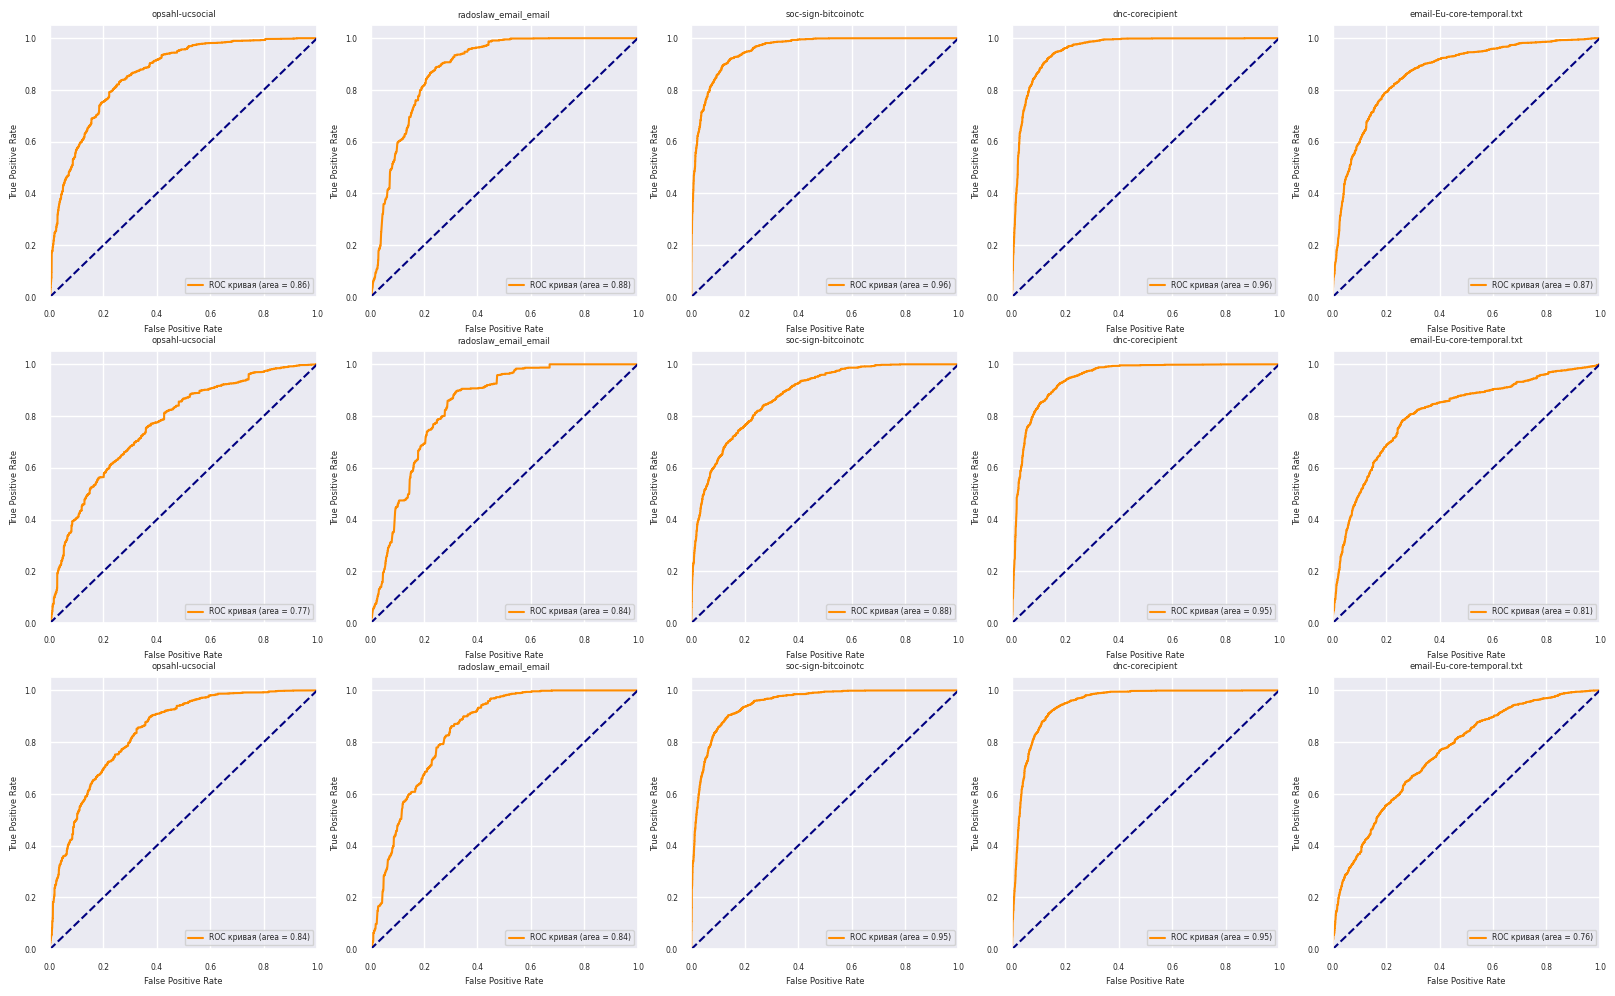

In [ ]:
logReg(list_result_df, list_of_name, cols, cols_static, cols_temporal)

In [ ]:
for c, t in [(cols, '\tСмешанные'), (cols_static, '\tСтатические'), (cols_temporal, '\tВременные')]:
  print(t)
  logReg(list_result_df, c, list_of_name)
  print()

Графики показывают как сильно те или иные признаки влияют на целевую переменную


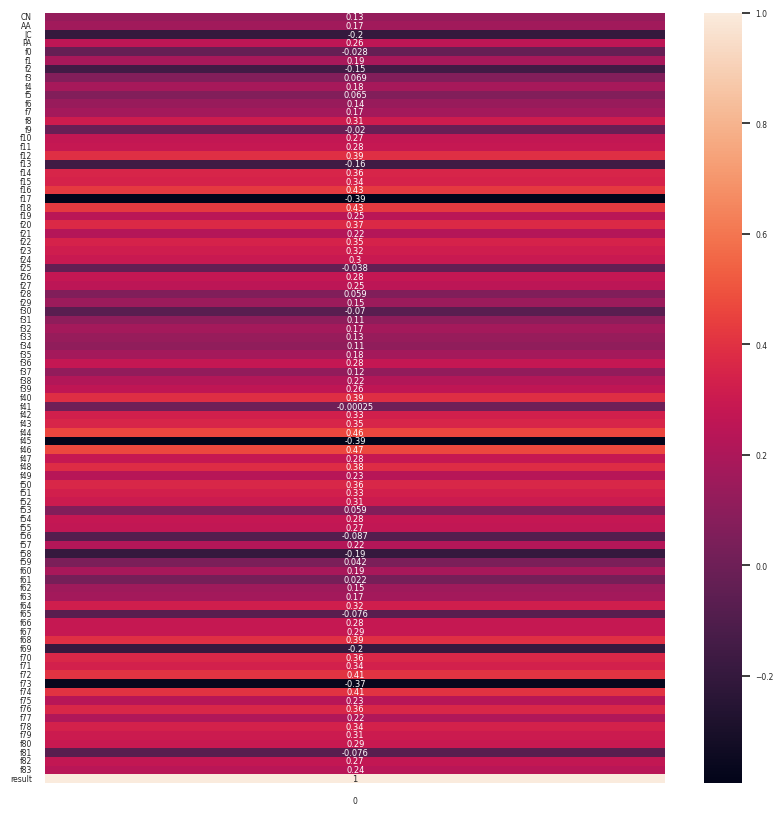

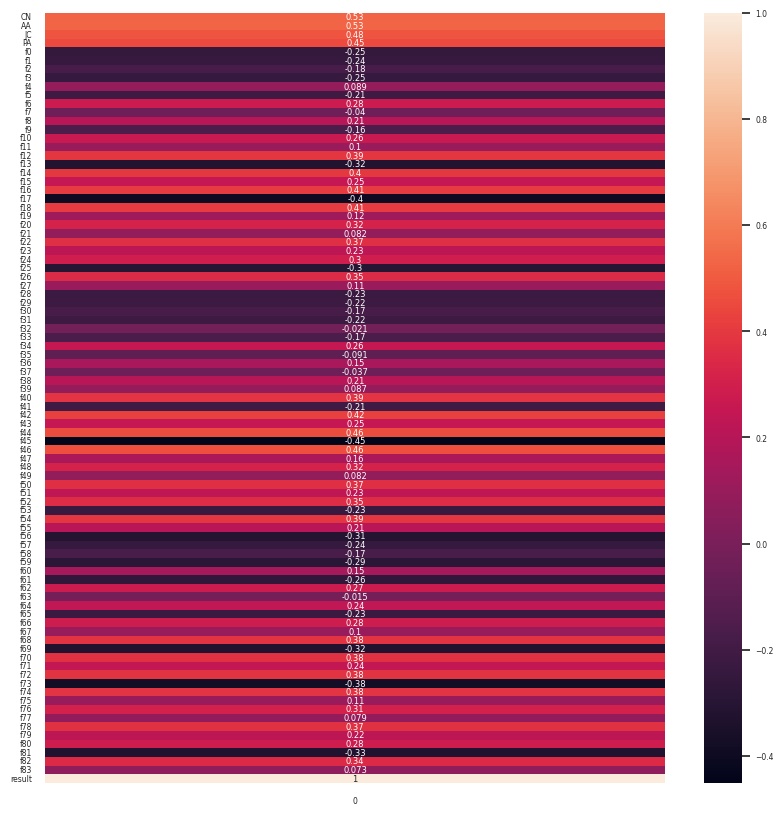

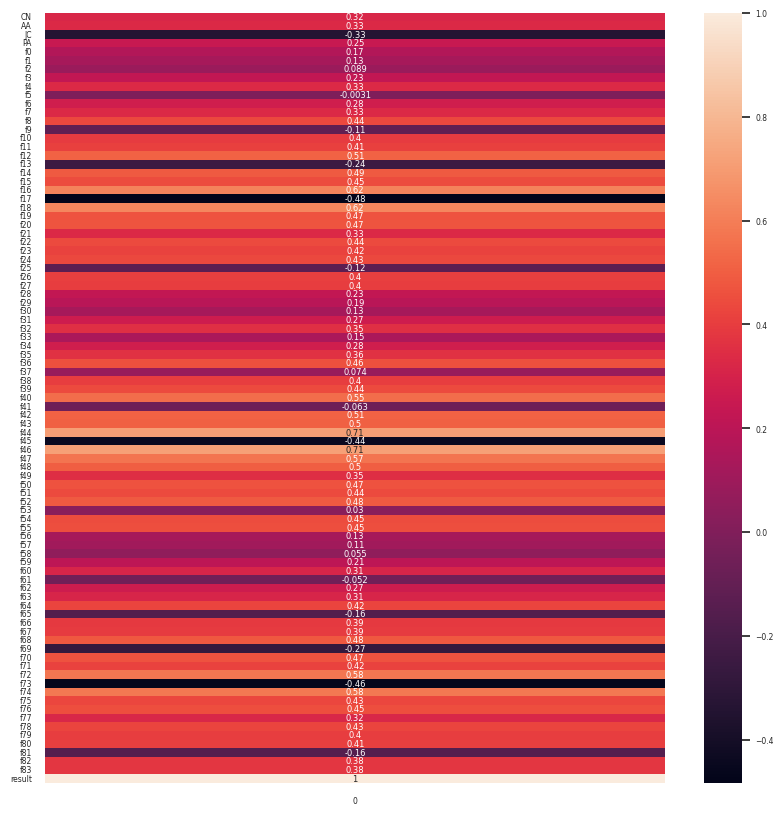

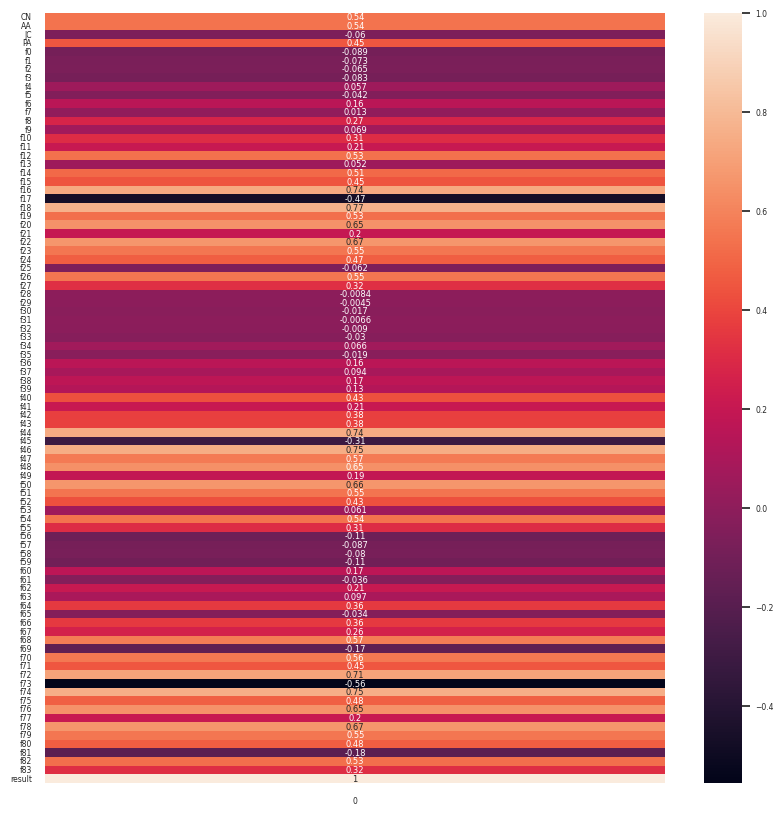

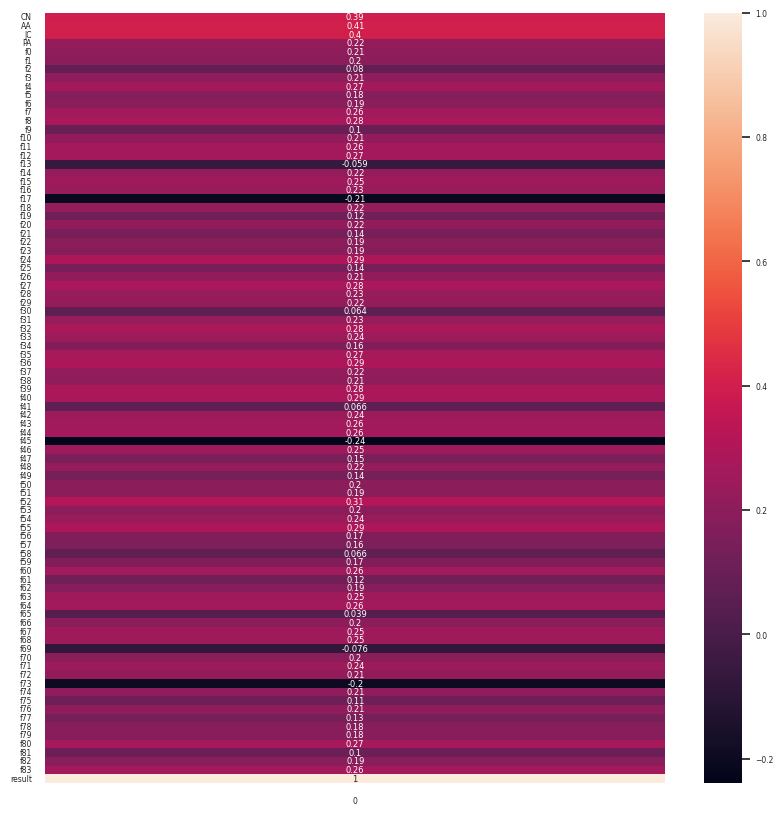

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
for p, name in zip(list_result_df, list_of_name):
  matplotlib.rcParams['savefig.dpi'] = 1000
  fig, ax = plt.subplots(figsize=(10,10))  
  sns.set(font_scale=0.5)   
  sns.heatmap(p[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1)), yticklabels=p[cols + ['result']].corr()['result'].index, ax=ax, annot=True)


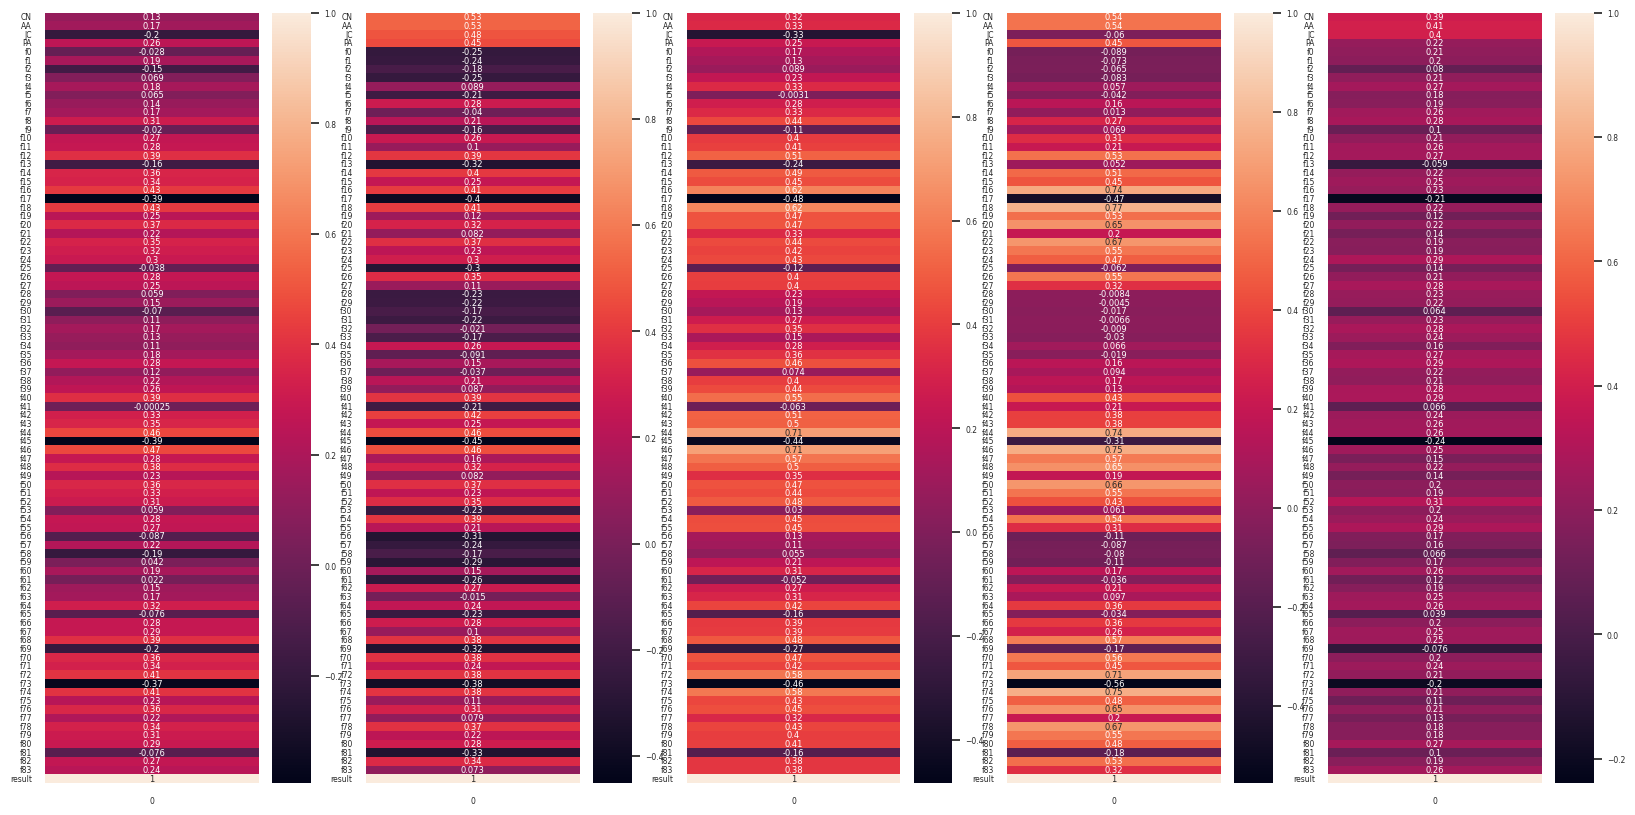

In [208]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1000
fig, ax = plt.subplots(1, 5, figsize=(20,10))  
i = 0
for p, name in zip(list_result_df, list_of_name):
  sns.set(font_scale=0.5)   
  sns.heatmap(p[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1)), yticklabels=p[cols + ['result']].corr()['result'].index, ax=ax[i], annot=True)
  i += 1
